In [1]:
tabulka <- read.table("jester_ratings_single_tab.dat", sep="\t", header=FALSE)

In [2]:
colnames(tabulka) <- c("User", "Joke", "Rating")

## Basic information

In [3]:
str(tabulka)

'data.frame':	1761439 obs. of  3 variables:
 $ User  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Joke  : int  5 7 8 13 15 16 17 18 19 20 ...
 $ Rating: num  0.219 -9.281 -9.281 -6.781 0.875 ...


In [4]:
nrow(tabulka)

[1] 1761439

In [5]:
head(tabulka)

User Joke Rating
1 1     5    0.219
2 1     7   -9.281
3 1     8   -9.281
4 1    13   -6.781
5 1    15    0.875
6 1    16   -9.656

In [6]:
summary(tabulka)

      User            Joke            Rating       
 Min.   :    1   Min.   :  5.00   Min.   :-10.000  
 1st Qu.:17202   1st Qu.: 21.00   1st Qu.: -2.031  
 Median :34808   Median : 69.00   Median :  2.219  
 Mean   :32723   Mean   : 70.71   Mean   :  1.619  
 3rd Qu.:47306   3rd Qu.:112.00   3rd Qu.:  5.719  
 Max.   :63978   Max.   :150.00   Max.   : 10.000  

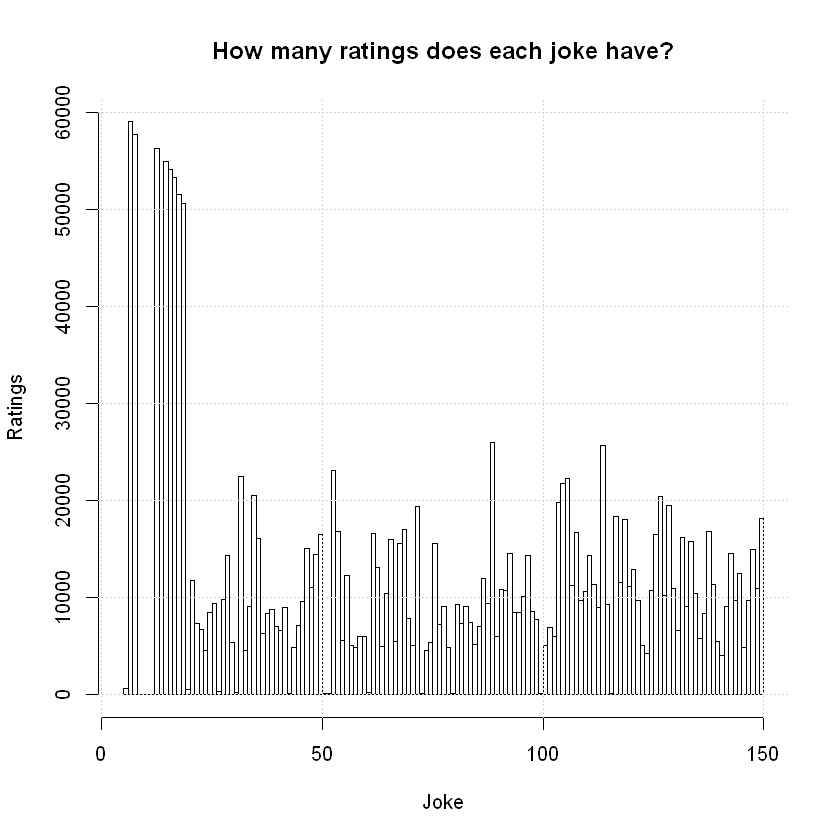

In [7]:
jokeNumbers <- levels(factor(tabulka$Joke))
hist(tabulka$Joke, 
     main="How many ratings does each joke have?", 
     xlab="Joke",
     ylab="Ratings",
     breaks=140)
grid()

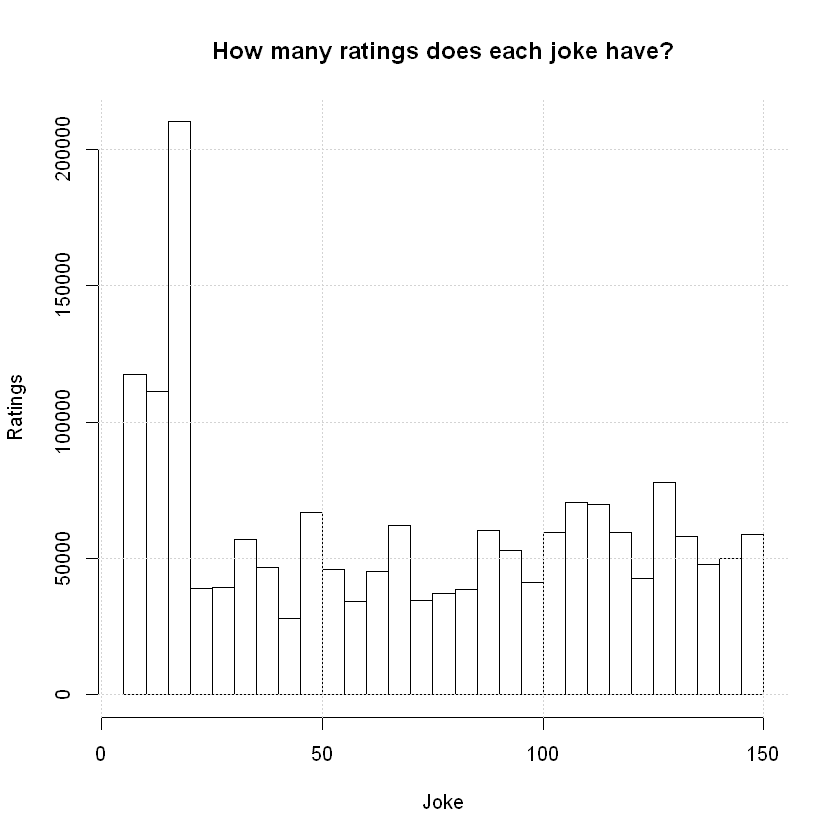

In [8]:
hist(tabulka$Joke, 
     main="How many ratings does each joke have?", 
     xlab="Joke",
     ylab="Ratings")
grid()

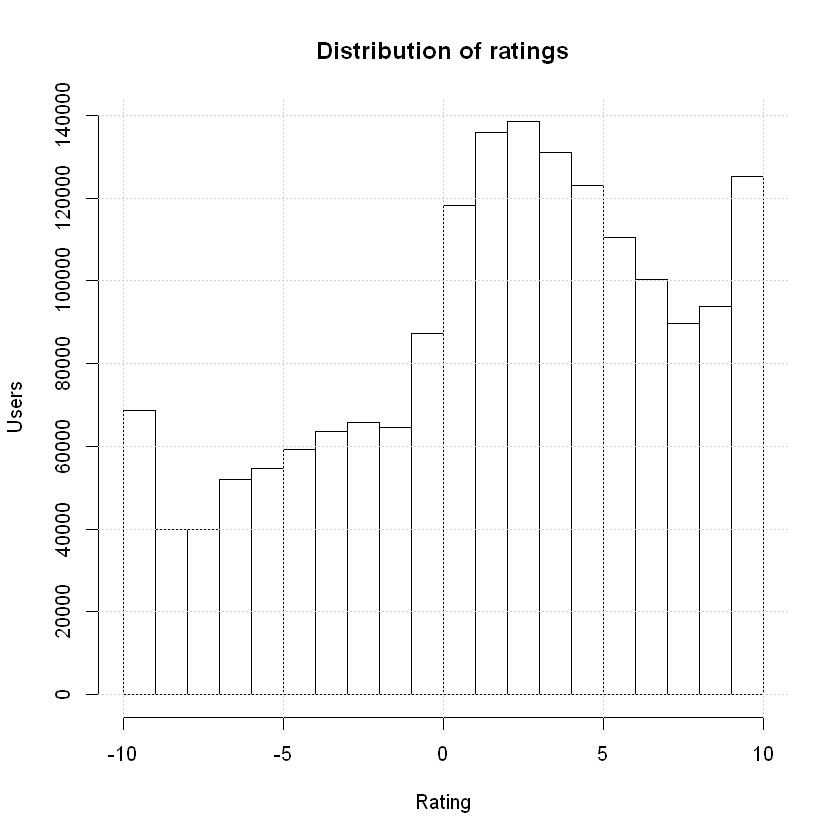

In [9]:
hist(tabulka$Rating, 
     main="Distribution of ratings", 
     xlab="Rating",
     ylab="Users")
grid()

[1] "Most rated jokes"


Number of jokes Number of times rated
8   8               7512                 
128 128             2906                 
9   9               2198                 
10  10              1955                 
11  11              1784                 
13  13              1764                 
6   6               1757                 
12  12              1644                 
14  14              1518                 
15  15              1428

[1] "Least rated jokes"


Number of jokes Number of times rated
125 125             33                   
117 117             32                   
118 118             32                   
124 124             31                   
126 126             29                   
133 140              5                   
130 132              2                   
129 131              1                   
131 136              1                   
132 139              1

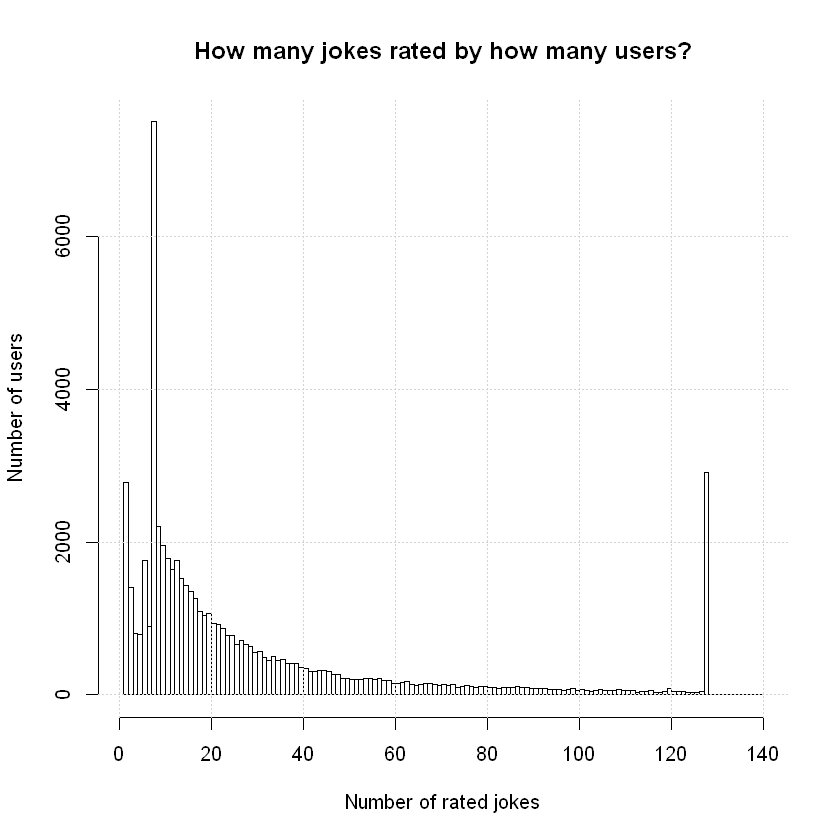

In [10]:
avgUserCount <- as.data.frame(table(tabulka$User))
numberOfRatedJokesPerUser <- avgUserCount$Freq
hist(numberOfRatedJokesPerUser,
     main="How many jokes rated by how many users?",
     xlab="Number of rated jokes",
     ylab="Number of users",
    breaks=140)
grid()
numberOfRatedJokes <- as.data.frame(table(numberOfRatedJokesPerUser))
sortedNumberOfRatedJokes <- numberOfRatedJokes[order(numberOfRatedJokes$Freq, decreasing=TRUE),]
colnames(sortedNumberOfRatedJokes) <- c("Number of jokes", "Number of times rated")
print("Most rated jokes")
sortedNumberOfRatedJokes[1:10,]
print("Least rated jokes")
sortedNumberOfRatedJokes[124:133,]

In [13]:
# Count average rating for each joke
library(data.table)
average_ratings <- aggregate(tabulka$Rating, list(tabulka$Joke), mean)
colnames(average_ratings) <- c("Joke", "Rating")
DT <- data.table(tabulka)
average_ratings_weighted <- DT[,list(wret = weighted.mean(Rating)),by=Joke]
average_ratings_weighted <- average_ratings_weighted[order(average_ratings_weighted$Joke),]
average_ratings_weighted <- as.data.frame(average_ratings_weighted)
colnames(average_ratings_weighted) <- c("Joke", "Rating")

# Sort the jokes by weighted ratings
all <- average_ratings_weighted[order(average_ratings_weighted$Rating, decreasing=TRUE),]

all[1:3,]
# Best jokes are (from the best): 53, 105, 89

all[138:140,]
# Worst jokes are (from the worst): 141, 124, 7

Joke Rating  
43  53  3.714381
95 105  3.711223
79  89  3.606506

Joke Rating   
2     7  -1.809230
114 124  -2.163482
131 141  -2.749574

## Comparison of weighted and unweighted means

Color | Used metrics
--- | ---
GREEN      | weighted aritmetic mean
ORANGE     | ordinary aritmetic mean


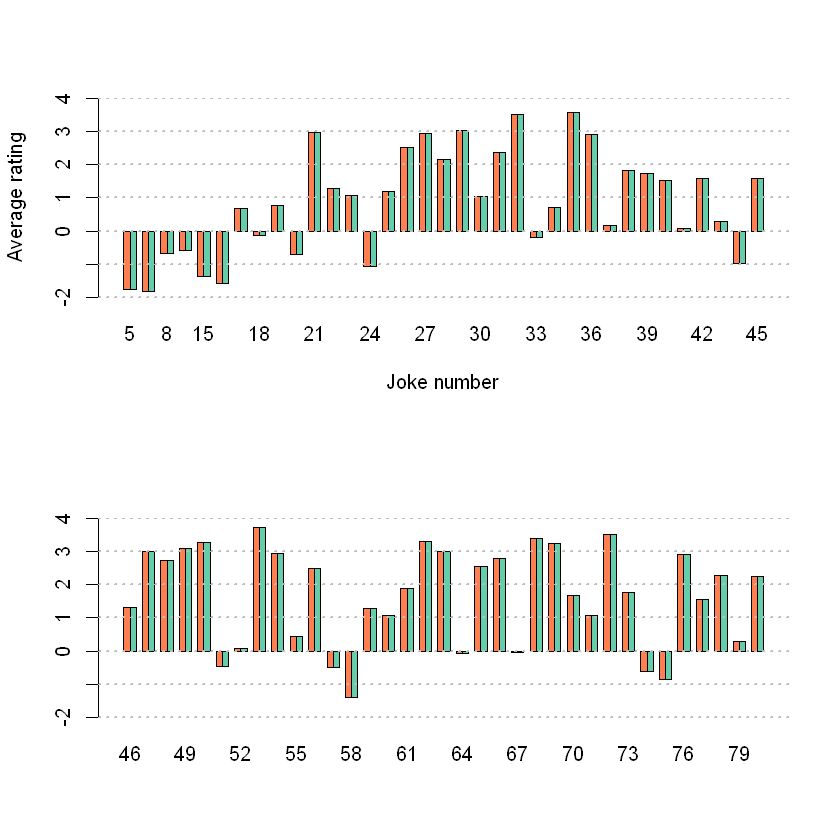

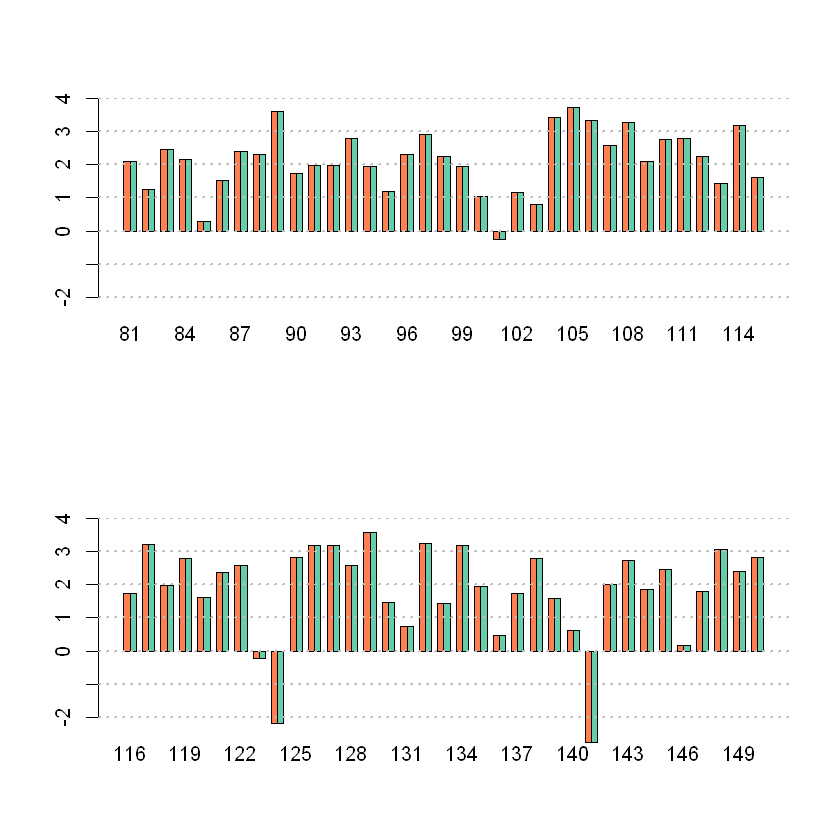

In [12]:
# visualize the weighted and unweighted ratings side-by-side
par(mfrow = c(2, 1))
z <- c(rbind(average_ratings$Rating,
             average_ratings_weighted$Rating))

z35 <- z[1:70] # initial 35 pairs ratings
barplot(matrix(z35, nr=2),
        beside=T, 
        col=c("coral", "aquamarine3"),
        ylim=c(-2,4),
        names.arg = average_ratings[1:35,]$Joke,
        xlab="Joke number",
        ylab="Average rating")
grid (NA,NULL, lty = "dotted", col = "grey", lwd = 2)


z70 <- z[71:140] # another 35 pairs
barplot(matrix(z70, nr=2),
        beside=T, 
        col=c("coral", "aquamarine3"),
        ylim=c(-2,4),
        names.arg = average_ratings[36:70,]$Joke)
grid (NA,NULL, lty = "dotted", col = "grey", lwd = 2) 

par(mfrow = c(2, 1))

z105 <- z[141:210]
barplot(matrix(z105, nr=2),
        beside=T, 
        col=c("coral", "aquamarine3"),
        ylim=c(-2,4),
        names.arg = average_ratings[71:105,]$Joke)
grid (NA,NULL, lty = "dotted", col = "grey", lwd = 2) 

z140 <- z[211:280]
barplot(matrix(z140, nr=2),
        beside=T, 
        col=c("coral", "aquamarine3"),
        ylim=c(-2,4),
        names.arg = average_ratings[106:140,]$Joke)
grid (NA,NULL, lty = "dotted", col = "grey", lwd = 2)